<a href="https://colab.research.google.com/github/HARRYPLONES1/PORTAFILIO_IA/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12

In [ ]:
from datasets import get_dataset_split_names

get_dataset_split_names("dair-ai/emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


['train', 'validation', 'test']

In [ ]:
from datasets import load_dataset
ds = load_dataset("dair-ai/emotion", "split")
print(ds)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
print(ds["train"][:5])
unique_labels = ds["train"].unique("label")
print(unique_labels)


{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
[0, 3, 2, 5, 4, 1]


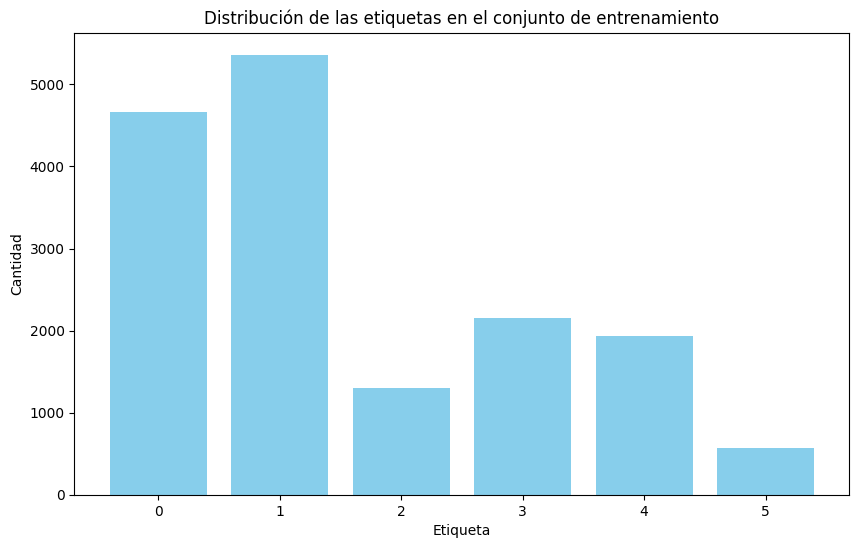

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Extraer las etiquetas del conjunto de entrenamiento
labels = ds["train"]["label"]

# Contar las ocurrencias de cada etiqueta
label_counts = Counter(labels)

# Obtener las etiquetas únicas y sus respectivas cuentas
labels_unique = list(label_counts.keys())
counts = list(label_counts.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels_unique, counts, color='skyblue')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.title('Distribución de las etiquetas en el conjunto de entrenamiento')
plt.xticks(labels_unique)

# Mostrar el gráfico
plt.show()

In [ ]:
import random
from datasets import Dataset

In [ ]:
# Filtrar los ejemplos con las etiquetas 0 y 1
label_0_examples = [example for example in ds["train"] if example["label"] == 0]
label_1_examples = [example for example in ds["train"] if example["label"] == 1]

# Seleccionar una muestra aleatoria de 2000 ejemplos de cada etiqueta
random.seed(42)  # Para reproducibilidad
sampled_label_0 = random.sample(label_0_examples, 2000)
sampled_label_1 = random.sample(label_1_examples, 2000)

# Filtrar el resto de los datos del conjunto de entrenamiento
other_examples = [example for example in ds["train"] if example["label"] not in [0, 1]]

# Combinar las muestras con el resto de los datos
new_train_examples = sampled_label_0 + sampled_label_1 + other_examples

# Crear un nuevo dataset de entrenamiento
new_train_dataset = Dataset.from_dict({
    "text": [example["text"] for example in new_train_examples],
    "label": [example["label"] for example in new_train_examples]
})

# Crear un nuevo DatasetDict con el nuevo conjunto de entrenamiento
new_ds = ds.copy()
new_ds["train"] = new_train_dataset

# Comprobar el nuevo tamaño del conjunto de entrenamiento
print(new_ds)

{'train': Dataset({
    features: ['text', 'label'],
    num_rows: 9972
}), 'validation': Dataset({
    features: ['text', 'label'],
    num_rows: 2000
}), 'test': Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})}


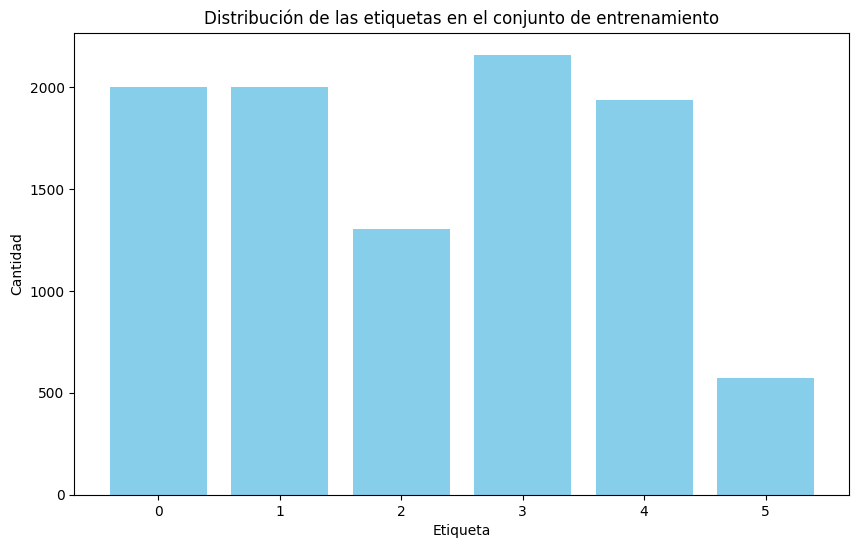

In [ ]:
# Extraer las etiquetas del conjunto de entrenamiento
labels = new_ds["train"]["label"]

# Contar las ocurrencias de cada etiqueta
label_counts = Counter(labels)

# Obtener las etiquetas únicas y sus respectivas cuentas
labels_unique = list(label_counts.keys())
counts = list(label_counts.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(labels_unique, counts, color='skyblue')
plt.xlabel('Etiqueta')
plt.ylabel('Cantidad')
plt.title('Distribución de las etiquetas en el conjunto de entrenamiento')
plt.xticks(labels_unique)

# Mostrar el gráfico
plt.show()

In [ ]:
train_dataset = new_ds["train"]
validation_dataset = ds["validation"]
test_dataset = ds["test"]

In [ ]:
print(new_ds["train"][:5])
unique_labels = new_ds["train"].unique("label")
print(unique_labels)

{'text': ['im feel alone and i dont know how to cope', 'i feel if journalists then blamed me', 'i can t help but think that oakwood must feel unwelcome on our campus', 'i feel slightly disturbed by the whole thing', 'i feel completely isolated in the world thinking that i m the only one like me'], 'label': [0, 0, 0, 0, 0]}
[0, 1, 3, 2, 5, 4]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
# Configuración de parámetros
max_words = 1000  # Número máximo de palabras a considerar
max_len = 10      # Longitud máxima de las secuencias

# Tokenización
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_dataset["text"])
sequences = tokenizer.texts_to_sequences(train_dataset["text"])
X = pad_sequences(sequences, maxlen=max_len)

# Etiquetas
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(train_dataset['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
3191/3191 [==============================] - 25s 6ms/step - loss: 1.3327 - accuracy: 0.4695 - val_loss: 0.9225 - val_accuracy: 0.6623
Epoch 2/10
3191/3191 [==============================] - 18s 6ms/step - loss: 0.8396 - accuracy: 0.7011 - val_loss: 0.8302 - val_accuracy: 0.6711
Epoch 3/10
3191/3191 [==============================] - 19s 6ms/step - loss: 0.7473 - accuracy: 0.7259 - val_loss: 0.8450 - val_accuracy: 0.6604
Epoch 4/10
3191/3191 [==============================] - 17s 5ms/step - loss: 0.6728 - accuracy: 0.7441 - val_loss: 0.8880 - val_accuracy: 0.6642
Epoch 5/10
3191/3191 [==============================] - 18s 6ms/step - loss: 0.6088 - accuracy: 0.7715 - val_loss: 0.9789 - val_accuracy: 0.6617
Epoch 6/10
3191/3191 [==============================] - 18s 6ms/step - loss: 0.5525 - accuracy: 0.7892 - val_loss: 1.0133 - val_accuracy: 0.6535
Epoch 7/10
3191/3191 [==============================] - 18s 6ms/step - loss: 0.4967 - accuracy: 0.8124 - val_loss: 1.0862 - val_ac

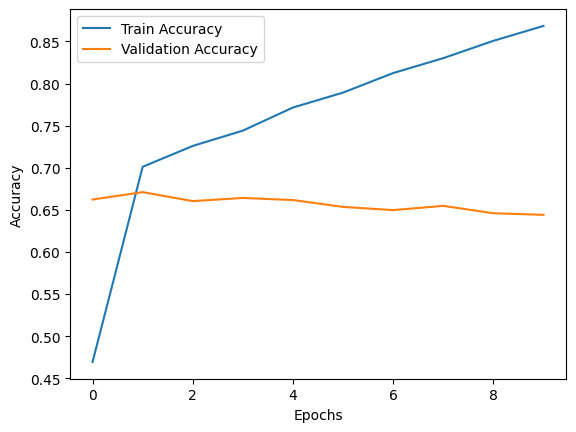

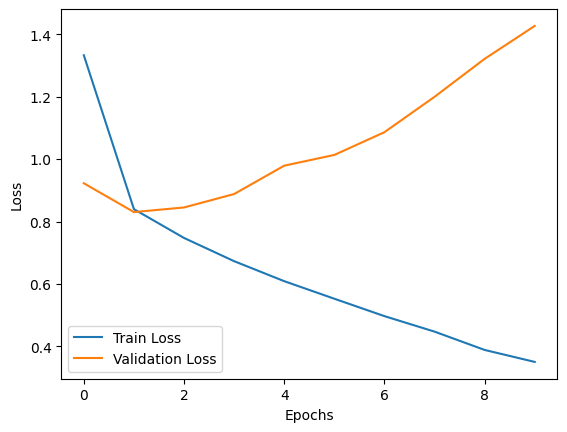

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

# Visualización del entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()